In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("C:/Users/dell/Downloads/Daily_Sales_Analysis.xlsx", sheet_name="Sheet2")

In [3]:
df.head(5)


,Order ID,ASIN,Name,Purchase,District2,Emirate2,Brand,Flavor,Unit Price,Quantity,FBA Fees,Total Order,Net Revenue,Estimated Cost,Estimated Profit,Order Item ID
0,407-7940610-8402734,B0CRPGWZCP,C5 SuperCharge Pina Colada,2024-03-17,"Jumeirah Village South,",Dubai,C5 SuperCharge,Pina Colada,142.00,1,30.19,142.00,111.81,56.800,55.010,Order Item ID: 36655116567682
1,407-7571554-0786707,B0CRPGWZCP,C5 SuperCharge Pina Colada,2024-03-21,"Desert Village,",Abu Dhabi,C5 SuperCharge,Pina Colada,142.00,1,30.19,142.00,111.81,56.800,55.010,Order Item ID: 36778383655162
2,404-4308500-7275503,B0CWH32XG7,XBOND Bottle Vemtos,2024-03-28,"DAMAC Hills,",Dubai,XBOND Bottle,Vemtos,135.00,1,31.39,135.00,103.61,54.000,49.610,Order Item ID: 36930592461242
3,171-3889233-1945901,B0CQ89X5MH,C5 Extreme Pina Colada,2024-03-28,"Jumeirah Village Circle JVC,",Dubai,C5 Extreme,Pina Colada,178.00,1,31.39,178.00,146.61,71.200,75.410,Order Item ID: 36951231939242
4,171-2480370-9743558,B0CQ89X5MH,C5 Extreme Pina Colada,2024-03-28,"The Palm Jumeirah,",Dubai,C5 Extreme,Pina Colada,159.99,1,31.39,159.99,128.60,63.996,64.604,Order Item ID: 36956773145522


In [4]:
# Calculate the percentage of missing values
missing_values = df.isnull().sum()
missing_values

Order ID            0
ASIN                0
Name                0
Purchase            0
District2           0
Emirate2            7
Brand               0
Flavor              0
Unit Price          0
Quantity            0
FBA Fees            0
Total Order         0
Net Revenue         0
Estimated  Cost     0
Estimated Profit    0
Order Item ID       0
dtype: int64

In [5]:
print("The Duplicates present in the Dataset are: ", df.duplicated().any())
print("The Number of Duplicates present in the Dataset are: ", df.duplicated().sum())

The Duplicates present in the Dataset are:  False
The Number of Duplicates present in the Dataset are:  0


In [6]:
# Group by product name and sum Net Revenue
top_products_by_net_revenue = df.groupby('Name')['Net Revenue'].sum().reset_index()

# Sort in descending order and select top 3
top_3_products_by_net_revenue = top_products_by_net_revenue.sort_values(by='Net Revenue', ascending=False).head(3)

# Display the result
top_3_products_by_net_revenue


,Name,Net Revenue
16,C5 Extreme Powder Passion Fruit Mango,8548.50
32,C5 SuperCharge Passion Fruit Mango,7558.56
30,C5 SuperCharge Mixed Berry,6912.10


In [7]:
# Group by product name and sum Net Revenue
top_products_by_salesOrder = df.groupby(['Name', 'Emirate2'])['Net Revenue'].sum().reset_index()

# Sort in descending order and select top 3
top_3_products_by_salesOrder = top_products_by_salesOrder.sort_values(by='Net Revenue', ascending=False).head(3)

# Display the result
top_3_products_by_salesOrder


,Name,Emirate2,Net Revenue
65,C5 Extreme Powder Passion Fruit Mango,Dubai,5346.25
132,C5 SuperCharge Passion Fruit Mango,Dubai,4779.38
83,C5 Night Energy Flavor,Dubai,4666.50


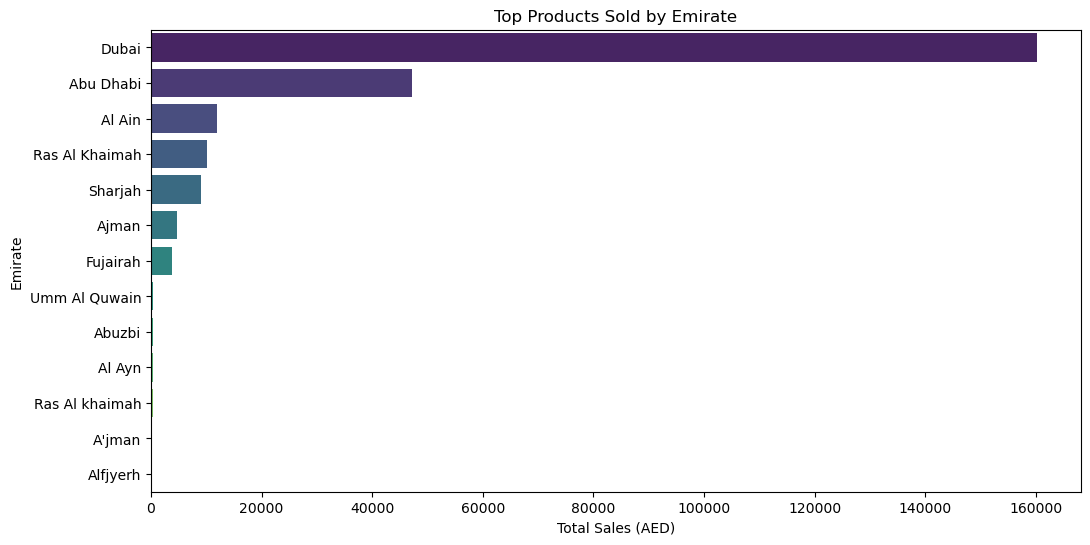

In [9]:
# Group by Emirate2 and sum the total sales (Total Order)
top_products_by_emirate = df.groupby("Emirate2")["Total Order"].sum().reset_index()

# Sort in descending order
top_products_by_emirate_sorted = top_products_by_emirate.sort_values(by="Total Order", ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Total Order", y="Emirate2", data=top_products_by_emirate_sorted, palette="viridis")

# Add labels and title
plt.title("Top Products Sold by Emirate")
plt.xlabel("Total Sales (AED)")
plt.ylabel("Emirate")

# Show the plot
plt.show()



In [10]:
# Identify the top-selling product in each Emirate based on total sales (Total Order)
top_product_per_emirate = df.loc[df.groupby("Emirate2")["Total Order"].idxmax(), ["Emirate2", "Name", "Total Order"]]

# Sort by Emirates for better readability
top_product_per_emirate = top_product_per_emirate.sort_values(by="Emirate2")

# Display the result
print(top_product_per_emirate)


            Emirate2                                 Name  Total Order
1604          A'jman              Protein Can Pina Colada        139.0
291        Abu Dhabi                      Hydration Mango        495.0
1622          Abuzbi             C5 Extreme Energy Flavor        298.0
398            Ajman                 C5 Night Mixed Berry        298.0
160           Al Ain          C5 SuperCharge Tutti Frutti        258.0
1572          Al Ayn            Protein Can Pink Lemonade        139.0
1606        Alfjyerh             Hydration Blue Raspberry         89.0
1055           Dubai            XBOND Bottle Lemon & Lime        645.0
409         Fujairah     C5 Extreme Powder Blue Raspberry        185.0
1095  Ras Al Khaimah      Protein Can Passion Fruit Mango        298.0
1334  Ras Al khaimah  C5 Night Powder Passion Fruit Mango        169.0
1161         Sharjah                     XBOND Can Mojito        387.0
274    Umm Al Quwain                 C5 Night Fruit Punch        149.0


In [11]:
print(df["Net Revenue"].describe())  # Check min and count
print(df[df["Net Revenue"] < 0])  # Show negative values
print(df[df["Net Revenue"].isna()])  # Show missing values


count    1707.000000
mean      112.567393
std        35.641127
min       -16.490000
25%        98.810000
50%       111.650000
75%       117.610000
max       488.050000
Name: Net Revenue, dtype: float64
                Order ID        ASIN                         Name   Purchase  \
266  403-1200273-3092341  B0D7TNF3VK  XBOND Can Strawberry & Kiwi 2024-08-31   

                      District2 Emirate2      Brand             Flavor  \
266  Jumeirah Lakes Towers JLT,    Dubai  XBOND Can  Strawberry & Kiwi   

     Unit Price  Quantity  FBA Fees  Total Order  Net Revenue  \
266        14.9         1     31.39         14.9       -16.49   

     Estimated  Cost  Estimated Profit                  Order Item ID  
266             5.96            -22.45  Order Item ID: 41423667423882  
Empty DataFrame
Columns: [Order ID, ASIN, Name, Purchase, District2, Emirate2, Brand, Flavor, Unit Price, Quantity, FBA Fees, Total Order, Net Revenue, Estimated  Cost, Estimated Profit, Order Item ID]
Index: []


In [12]:
df["Net Revenue"].fillna(0, inplace=True)  # Replace NaNs with 0
df = df[df["Net Revenue"] > 0]  # Remove negative values



C:\Users\dell\AppData\Local\Temp\ipykernel_13592\4002819229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Net Revenue"].fillna(0, inplace=True)  # Replace NaNs with 0


In [13]:
top_product_per_emirate = df.loc[df.groupby("Emirate2")["Net Revenue"].idxmax(), ["Emirate2", "Name", "Net Revenue"]]


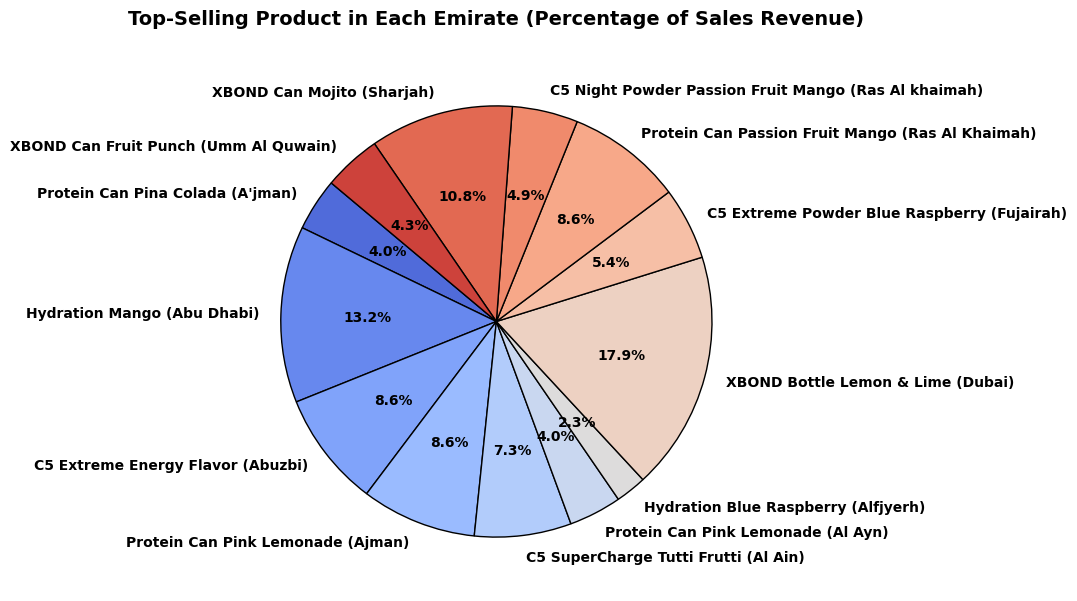

In [14]:
# Define colors
colors = sns.color_palette("coolwarm", len(top_product_per_emirate))

# Create a pie chart
plt.figure(figsize=(12, 7))
plt.pie(
    top_product_per_emirate["Net Revenue"],
    labels=top_product_per_emirate["Name"] + " (" + top_product_per_emirate["Emirate2"] + ")",
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Add a title
plt.title("Top-Selling Product in Each Emirate (Percentage of Sales Revenue)", fontsize=14, fontweight='bold', pad=20)

# Show the plot
plt.show()


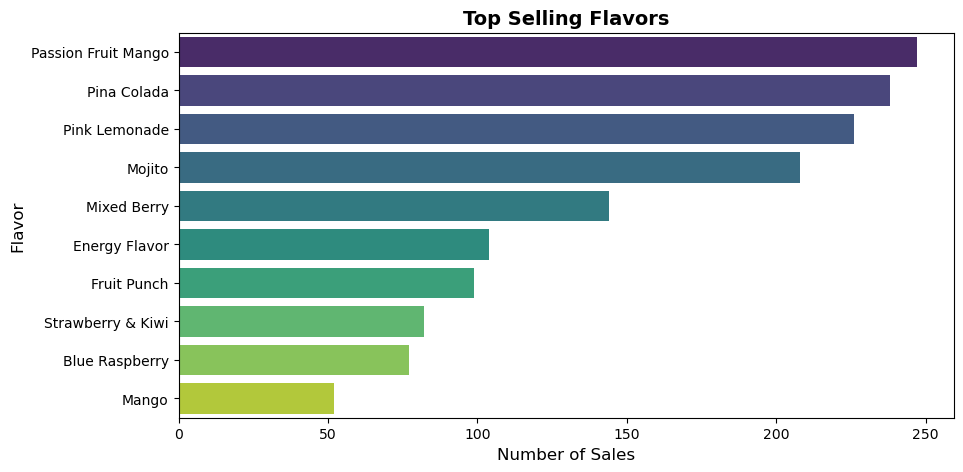

In [20]:
# Count number of sales per flavor
top_flavors = df["Flavor"].value_counts().head(10)  # Top 10 flavors

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_flavors.values, y=top_flavors.index, palette="viridis")

# Labels & Title
plt.xlabel("Number of Sales", fontsize=12)
plt.ylabel("Flavor", fontsize=12)
plt.title("Top Selling Flavors", fontsize=14, fontweight="bold")

# Show plot
plt.show()


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


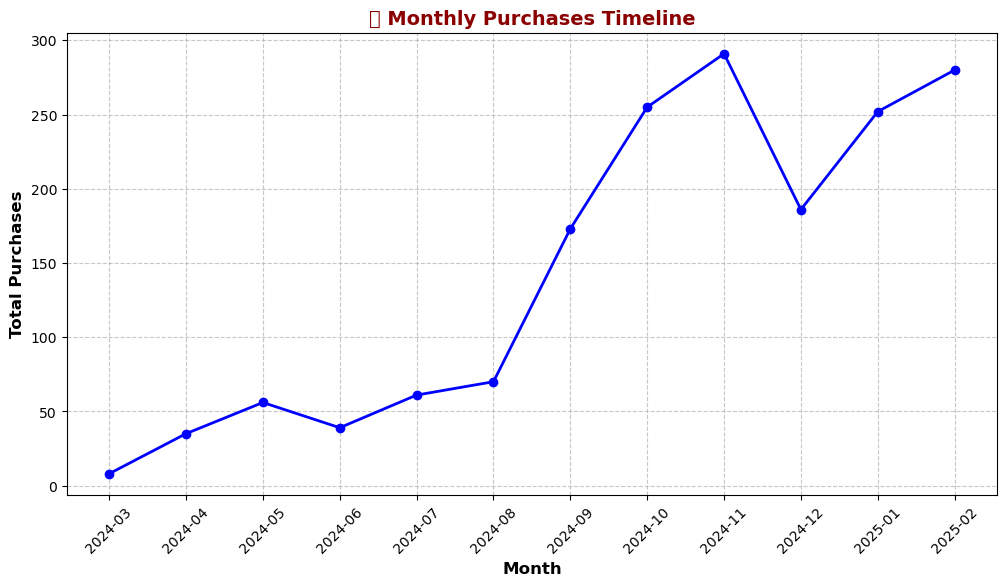

In [17]:
#####Sales Trend Analysis

# Convert 'Purchase' column to datetime format
df['Purchase'] = pd.to_datetime(df['Purchase'], errors='coerce')

# Extract year and month
df['Year-Month'] = df['Purchase'].dt.to_period('M')

# Aggregate sum of purchases per month
monthly_purchases = df.groupby('Year-Month')['Purchase'].count().reset_index()

# Convert 'Year-Month' back to string for plotting
monthly_purchases['Year-Month'] = monthly_purchases['Year-Month'].astype(str)

# Plot the timeline of purchases per month
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchases['Year-Month'], monthly_purchases['Purchase'], marker='o', linestyle='-', color='b', linewidth=2)

# Improve readability
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Total Purchases", fontsize=12, fontweight="bold")
plt.title("Monthly Purchases Timeline", fontsize=14, fontweight="bold", color="darkred")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


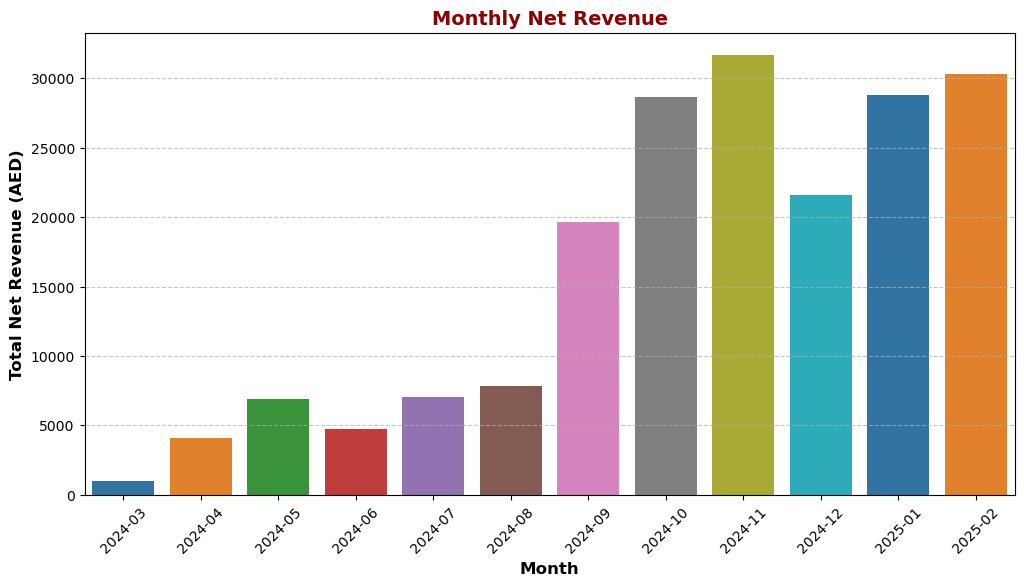

In [19]:
# Convert 'Purchase' column to datetime format
df['Purchase'] = pd.to_datetime(df['Purchase'], errors='coerce')

# Extract year and month
df['Year-Month'] = df['Purchase'].dt.to_period('M')

# Aggregate sum of Net Revenue per month
monthly_revenue = df.groupby('Year-Month')['Net Revenue'].sum().reset_index()

# Convert 'Year-Month' back to string for plotting
monthly_revenue['Year-Month'] = monthly_revenue['Year-Month'].astype(str)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Year-Month", y="Net Revenue", data=monthly_revenue, palette="tab10")

# Improve readability
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Total Net Revenue (AED)", fontsize=12, fontweight="bold")
plt.title("Monthly Net Revenue", fontsize=14, fontweight="bold", color="darkred")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


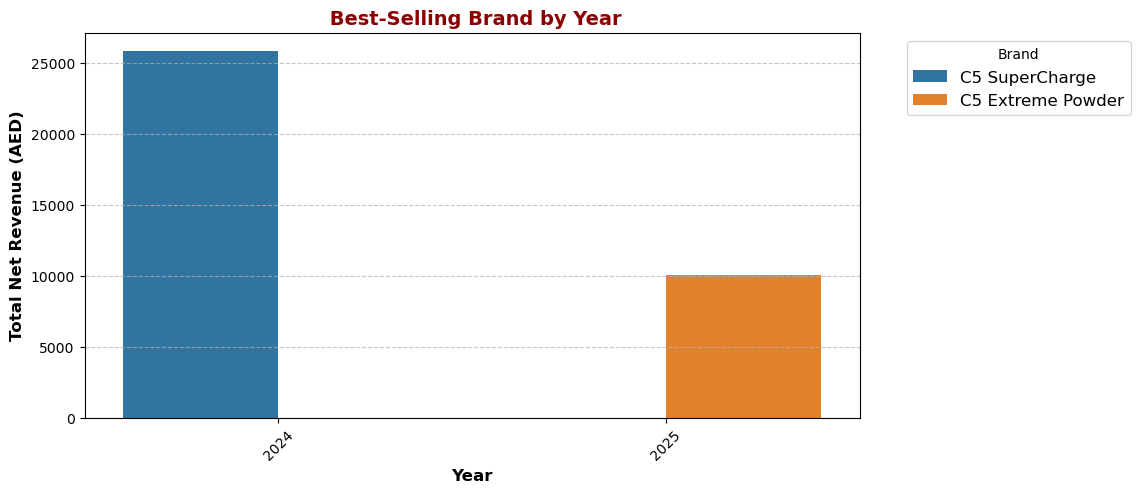

In [21]:
#####Brand Analysis


# Extract year from 'Purchase' column
df['Year'] = df['Purchase'].dt.year

# Group by Year and Brand, summing total Net Revenue
best_selling_brand = df.groupby(["Year", "Brand"])["Net Revenue"].sum().reset_index()

# Find the top-selling brand for each year
top_brand_per_year = best_selling_brand.loc[best_selling_brand.groupby("Year")["Net Revenue"].idxmax()]

# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Net Revenue", hue="Brand", data=top_brand_per_year, palette="tab10")

# Improve readability
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Total Net Revenue (AED)", fontsize=12, fontweight="bold")
plt.title(" Best-Selling Brand by Year", fontsize=14, fontweight="bold", color="darkred")
plt.xticks(rotation=45)
plt.legend(title="Brand", fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


          Emirate2              Brand  Total Orders
47           Dubai     C5 SuperCharge           213
43           Dubai         C5 Extreme           127
50           Dubai          Hydration           122
54           Dubai        Protein Can           116
44           Dubai  C5 Extreme Powder           113
6        Abu Dhabi     C5 SuperCharge            62
3        Abu Dhabi         C5 Extreme            44
4        Abu Dhabi  C5 Extreme Powder            39
8        Abu Dhabi          Hydration            32
12       Abu Dhabi        Protein Can            32
30          Al Ain     C5 SuperCharge            20
71  Ras Al Khaimah     C5 SuperCharge            14
83         Sharjah     C5 SuperCharge            14
35          Al Ain        Protein Can            13
73  Ras Al Khaimah          Hydration            11
80         Sharjah  C5 Extreme Powder            10
69  Ras Al Khaimah  C5 Extreme Powder             9
21           Ajman     C5 SuperCharge             8
79         S

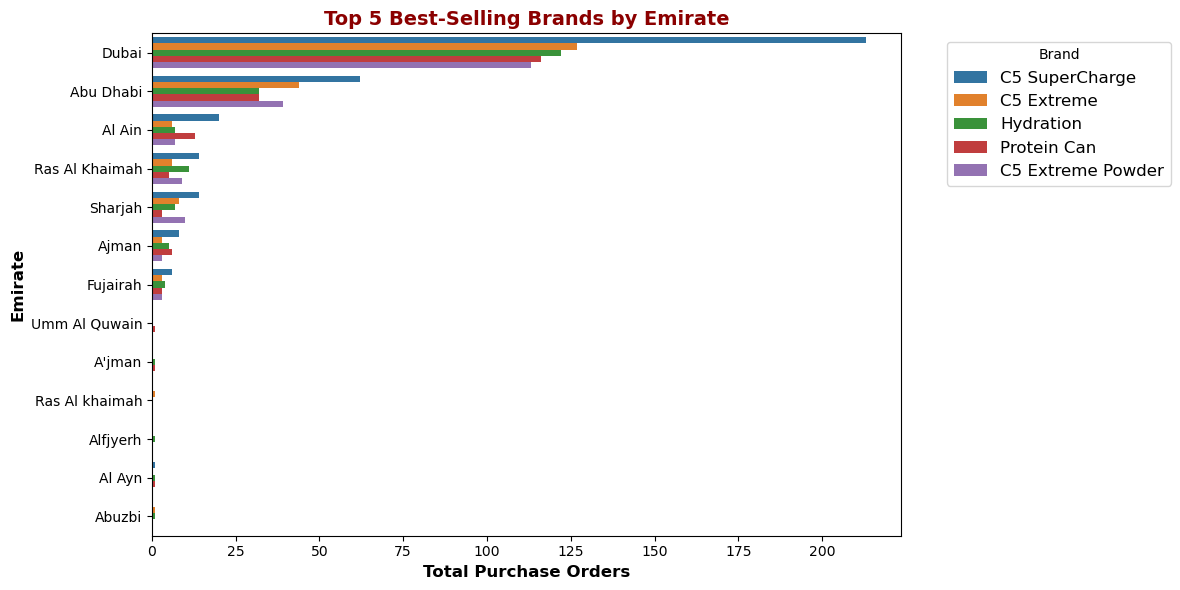

In [22]:
# Count the number of orders for each brand by emirate
brand_orders_by_emirate = df.groupby(["Emirate2", "Brand"]).size().reset_index(name="Total Orders")

# Sort the data in descending order based on Total Orders
brand_orders_by_emirate = brand_orders_by_emirate.sort_values(by="Total Orders", ascending=False)

# Select the top 5 best-selling brands based on total orders
top_5_brands = brand_orders_by_emirate.groupby("Brand")["Total Orders"].sum().reset_index()
top_5_brands = top_5_brands.sort_values(by="Total Orders", ascending=False).head(5)

# Filter the dataset to only include the top 5 brands
top_5_brand_orders = brand_orders_by_emirate[brand_orders_by_emirate["Brand"].isin(top_5_brands["Brand"])]

# Display the table of top 5 brands by emirate
print(top_5_brand_orders)

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for the top 5 brands
sns.barplot(
    x="Total Orders", 
    y="Emirate2", 
    hue="Brand", 
    data=top_5_brand_orders, 
    palette="tab10"
)

# Improve readability
plt.xlabel("Total Purchase Orders", fontsize=12, fontweight="bold")
plt.ylabel("Emirate", fontsize=12, fontweight="bold")
plt.title("Top 5 Best-Selling Brands by Emirate", fontsize=14, fontweight="bold", color="darkred")

# Adjust legend for better readability
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


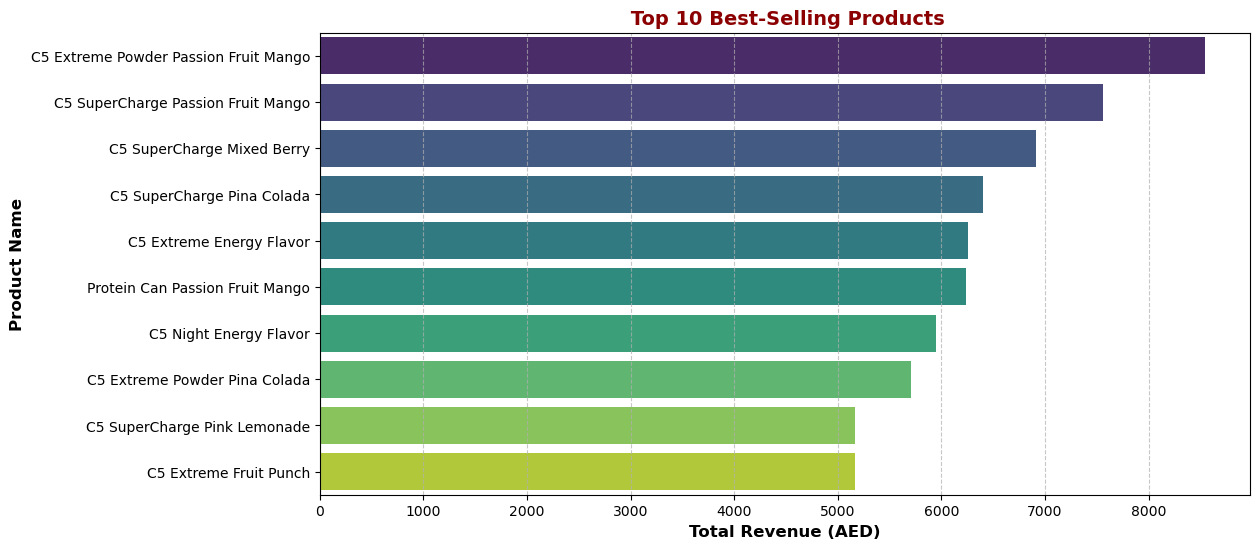

In [24]:
#####Best10 Selling products


# Group by product and sum total revenue
top_products = df.groupby("Name")["Net Revenue"].sum().reset_index()

# Sort and select top 10
top_products = top_products.sort_values(by="Net Revenue", ascending=False).head(10)

# Plot the top products
plt.figure(figsize=(12, 6))
sns.barplot(x="Net Revenue", y="Name", data=top_products, palette="viridis")

# Improve readability
plt.xlabel("Total Revenue (AED)", fontsize=12, fontweight="bold")
plt.ylabel("Product Name", fontsize=12, fontweight="bold")
plt.title(" Top 10 Best-Selling Products", fontsize=14, fontweight="bold", color="darkred")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


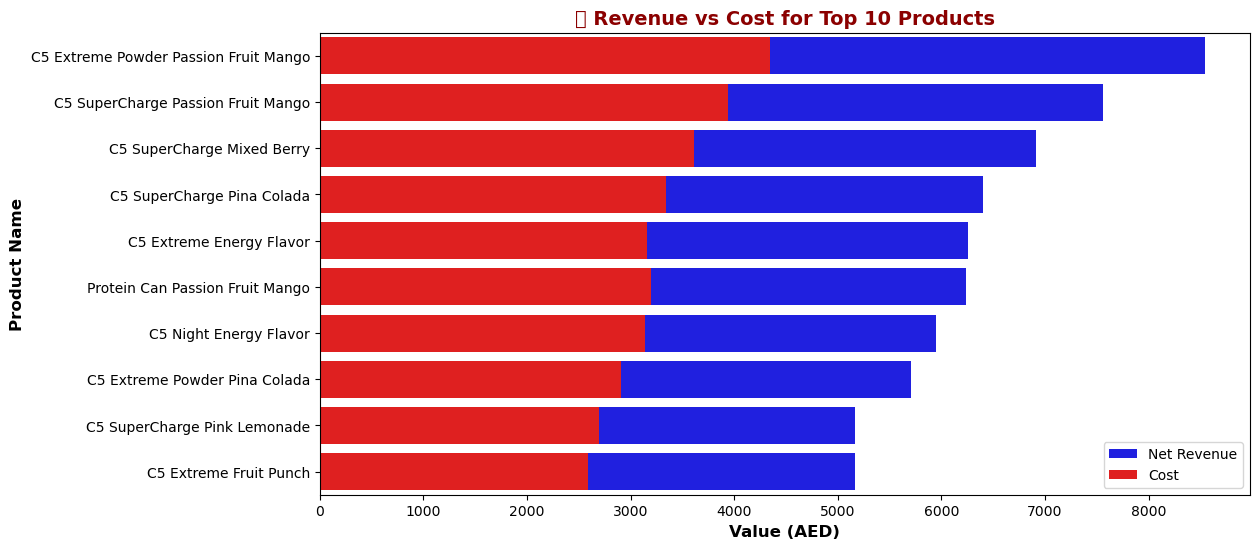

In [26]:
#####Profitability Analysis


# Group by product and sum revenue & cost
profitability = df.groupby("Name")[["Net Revenue", "Estimated  Cost"]].sum().reset_index()

# Sort by net revenue
profitability = profitability.sort_values(by="Net Revenue", ascending=False).head(10)

# Plot revenue vs. cost
plt.figure(figsize=(12, 6))
sns.barplot(x="Net Revenue", y="Name", data=profitability, color="blue", label="Net Revenue")
sns.barplot(x="Estimated  Cost", y="Name", data=profitability, color="red", label="Cost")

# Improve readability
plt.xlabel("Value (AED)", fontsize=12, fontweight="bold")
plt.ylabel("Product Name", fontsize=12, fontweight="bold")
plt.title("Revenue vs Cost for Top 10 Products", fontsize=14, fontweight="bold", color="darkred")
plt.legend()

# Show the plot
plt.show()


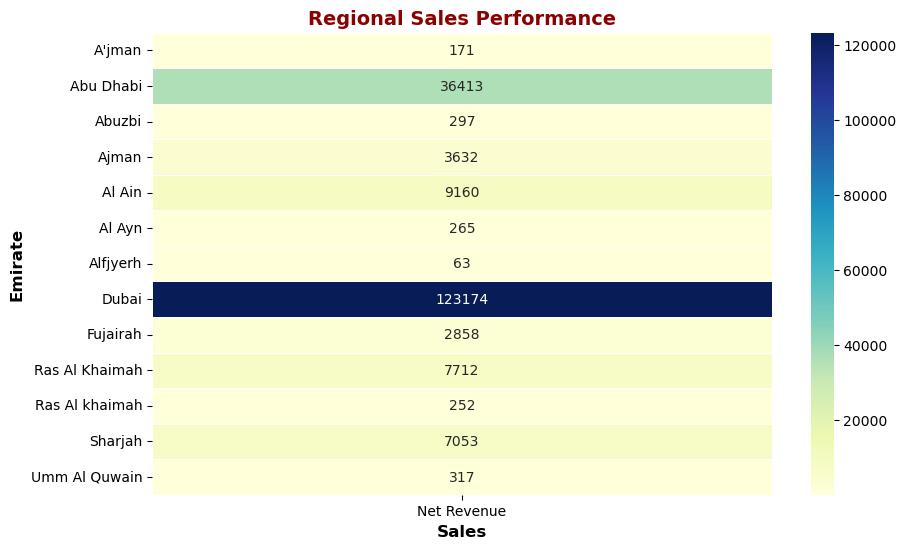

In [25]:
#####Regional Sales Performance 


# Group by Emirate and sum total revenue
regional_sales = df.groupby("Emirate2")["Net Revenue"].sum().reset_index()

# Pivot data for heatmap
regional_sales = regional_sales.pivot_table(index="Emirate2", values="Net Revenue")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(regional_sales, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

# Improve readability
plt.xlabel("Sales", fontsize=12, fontweight="bold")
plt.ylabel("Emirate", fontsize=12, fontweight="bold")
plt.title("Regional Sales Performance", fontsize=14, fontweight="bold", color="darkred")

# Show the plot
plt.show()
